# Question 2. Navigate

### Overview:

One of the software division’s primary tasks is creating an autonomous flight plan. At SUAS, we are given a list of 10 GPS coordinates as waypoints our UAV must fly to, and a geofence, essentially a polygon (convex or concave) defining the UAVs bounds. We use an edge smoothing algorithm known as centripetal catrom-mull spline (if you want to learn more, I would recommend using this Desmos sandbox), but for this question, we can assume that we just connect the waypoints, forming an n-gon. However, the polygon sometimes intersects with the geofence, resulting in an invalid flight plan, which must be corrected. Lastly, we use autopilot software known as QGroundControl (QGC) where plans can be imported using a .plan file.

### Your Task:

- Fix the flight plan by traversing within the geofence with a 25ft distance from the edge instead of exceeding its bounds (see demonstration image). 
- Generate a .plan file (hint: use JSON) which can be imported in QGC. Learn how these files are formatted by installing QGC on your personal computer (QGC Install) (if you are using a Chromebook, email prathampmehta@gmail.com, and we’ll try to find a compromise)

### Restrictions:

Don’t use non-standard libraries except shapely and numpy.

### File Input Format: 
The first line of input contains N, M followed by N lines with latitude, longitude for the geofence coordinates separated by spaces of each point, followed by M lines with latitude, longitude for the waypoints separated by spaces of each point

### File Output Format: 
Output the navigate.plan JSON file (to view, I recommend using a JSON editor) which can be directly imported into QGroundControl (assume the altitude for all coordinates is 100ft and waypoint speed is 30mph). The waypoint coordinates do not have to match the ones provided exactly, but they should be accurate to 4 decimal places.


### Load Input

In [1]:
def read_input(in_file):
    with open(in_file, "r") as fh:
        header = fh.readline()
        rec = header.split(" ")
        (N, M) = int(rec[0]), int(rec[1])

        points = []
        for line in fh:
            rec = line.strip().split(" ")
            points.append([float(rec[0]), float(rec[1])])
        
        geofence_coords = points[:N]
        waypoints = points[N:]

    return geofence_coords, waypoints

In [2]:
# test 
geofence_coords, waypoints = read_input("navigate.txt")

print("Geofence coordinates :", len(geofence_coords))
for point in geofence_coords:
    print(point)
print("Waypoints :", len(waypoints))
for point in waypoints:
    print(point)

Geofence coordinates : 18
[37.681518, -121.8936646]
[37.6815855, -121.8926105]
[37.6822613, -121.8916441]
[37.6817617, -121.8917269]
[37.6816344, -121.8912419]
[37.6813856, -121.8913558]
[37.680703, -121.8904147]
[37.6808425, -121.8908941]
[37.6805952, -121.8914147]
[37.6809136, -121.8911588]
[37.6811416, -121.8917205]
[37.6800919, -121.8913751]
[37.6796919, -121.8924466]
[37.6801628, -121.8926604]
[37.6806625, -121.8924309]
[37.6807229, -121.8929952]
[37.681113, -121.8930433]
[37.681518, -121.8936646]
Waypoints : 16
[37.6814695, -121.8934354]
[37.6817346, -121.8923366]
[37.6820057, -121.8918026]
[37.6815723, -121.8914061]
[37.6812009, -121.891247]
[37.6808829, -121.8907372]
[37.6807847, -121.8911661]
[37.6810793, -121.891398]
[37.6809256, -121.8917514]
[37.6801571, -121.8915545]
[37.6802019, -121.8919375]
[37.679901, -121.8923366]
[37.6803941, -121.8924472]
[37.680774, -121.8926684]
[37.6808722, -121.8929516]
[37.6814229, -121.8934263]


### View Input

In [3]:
import pandas as pd

point_types = ["geofence_coords", "waypoints"]
# Convert to dataframe
df = pd.DataFrame( 
    {
        "latitude": [p[0] for p in geofence_coords] + [p[0] for p in waypoints],
        "longitude": [p[1] for p in geofence_coords] + [p[1] for p in waypoints],
        "point_type": (
            [point_types.index("geofence_coords")] * len(geofence_coords) 
            + [point_types.index("waypoints")] * len(waypoints)
        ),
    }
)
df

,latitude,longitude,point_type
0,37.681518,-121.893665,0
1,37.681585,-121.892611,0
2,37.682261,-121.891644,0
3,37.681762,-121.891727,0
4,37.681634,-121.891242,0
5,37.681386,-121.891356,0
6,37.680703,-121.890415,0
7,37.680842,-121.890894,0
8,37.680595,-121.891415,0
9,37.680914,-121.891159,0


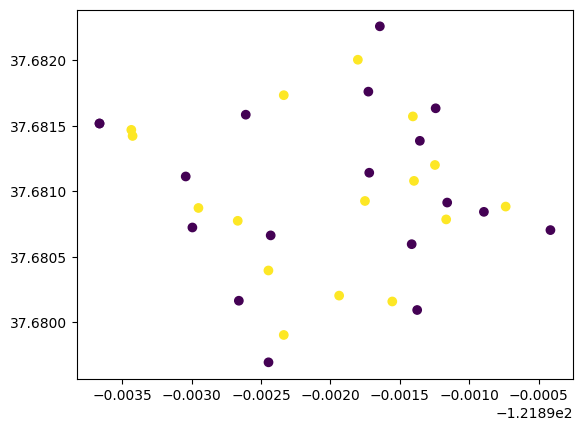

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data=df, x="longitude", y="latitude", c="point_type")

### View Output

In [5]:
import json

with open("navigate.plan", "r") as fh:
    plan_data = json.load(fh)

print(json.dumps(plan_data, indent=4))

{
    "fileType": "Plan",
    "version": 1,
    "geoFence": {
        "circles": [],
        "polygons": [
            {
                "inclusion": true,
                "polygon": [
                    [
                        37.681518,
                        -121.8936646
                    ],
                    [
                        37.6815855,
                        -121.8926105
                    ],
                    [
                        37.6822613,
                        -121.8916441
                    ],
                    [
                        37.6817617,
                        -121.8917269
                    ],
                    [
                        37.6816344,
                        -121.8912419
                    ],
                    [
                        37.6813856,
                        -121.8913558
                    ],
                    [
                        37.680703,
                        -121.8904147
              

#### Functions to convert to plan JSON for QGC

In [6]:
def create_plan_dict(geofence_coords, start_point):
    """
    return the initial empty plan
    args:
      - geofence_coords: a list of (latitude, longitude)
      - start_point: [latitude, longtidue, altitude]
    """
    return {
        "fileType": "Plan",
        "version": 1,
        "geoFence": {
            "circles": [],
            "polygons": [
                {
                    "inclusion": True,
                    "polygon": geofence_coords,
                    "version": 1
                }
            ],
            "version": 2
        },
        "rallyPoints": {
            "points": [],
            "version": 2
        },
        "groundStation": "QGroundControl",
        "mission": {
            "plannedHomePosition": start_point,
            "vehicleType": 2,
            "version": 2,
            "cruiseSpeed": 15,
            "firmwareType": 12,
            "globalPlanAltitudeMode": 1,
            "hoverSpeed": 15,
            "items": [],        
        }
    }

In [7]:
# Test
plan_dict = create_plan_dict(geofence_coords, waypoints[0]+[50])
print(json.dumps(plan_dict, indent=4))

{
    "fileType": "Plan",
    "version": 1,
    "geoFence": {
        "circles": [],
        "polygons": [
            {
                "inclusion": true,
                "polygon": [
                    [
                        37.681518,
                        -121.8936646
                    ],
                    [
                        37.6815855,
                        -121.8926105
                    ],
                    [
                        37.6822613,
                        -121.8916441
                    ],
                    [
                        37.6817617,
                        -121.8917269
                    ],
                    [
                        37.6816344,
                        -121.8912419
                    ],
                    [
                        37.6813856,
                        -121.8913558
                    ],
                    [
                        37.680703,
                        -121.8904147
              

In [8]:
def point_to_mission_dict(latitude, longitude, altitude=30.48780487804878):
    """Convert a point to a mission item for plan"""
    return {
        "AMSLAltAboveTerrain": altitude,
        "Altitude": altitude,
        "AltitudeMode": 1,
        "autoContinue": True,
        "command": 16,
        "doJumpId": 29,
        "frame": 3,
        "params": [0, 0, 0, None, latitude, longitude, altitude],
        "type": "SimpleItem"
    }

In [9]:
# test
print(json.dumps(point_to_mission_dict(waypoints[1][0], waypoints[1][1]), indent=4))

{
    "AMSLAltAboveTerrain": 30.48780487804878,
    "Altitude": 30.48780487804878,
    "AltitudeMode": 1,
    "autoContinue": true,
    "command": 16,
    "doJumpId": 29,
    "frame": 3,
    "params": [
        0,
        0,
        0,
        null,
        37.6817346,
        -121.8923366,
        30.48780487804878
    ],
    "type": "SimpleItem"
}


### Explore Shapely
https://shapely.readthedocs.io/en/stable/manual.html
- Polygon: https://shapely.readthedocs.io/en/stable/manual.html#polygons

In [10]:
from shapely import Point

geofence_pts = []
for point in geofence_coords:
    pt = Point(point)
    print(list(pt.coords), pt.bounds)
    geofence_pts.append(pt)

[(37.681518, -121.8936646)] (37.681518, -121.8936646, 37.681518, -121.8936646)
[(37.6815855, -121.8926105)] (37.6815855, -121.8926105, 37.6815855, -121.8926105)
[(37.6822613, -121.8916441)] (37.6822613, -121.8916441, 37.6822613, -121.8916441)
[(37.6817617, -121.8917269)] (37.6817617, -121.8917269, 37.6817617, -121.8917269)
[(37.6816344, -121.8912419)] (37.6816344, -121.8912419, 37.6816344, -121.8912419)
[(37.6813856, -121.8913558)] (37.6813856, -121.8913558, 37.6813856, -121.8913558)
[(37.680703, -121.8904147)] (37.680703, -121.8904147, 37.680703, -121.8904147)
[(37.6808425, -121.8908941)] (37.6808425, -121.8908941, 37.6808425, -121.8908941)
[(37.6805952, -121.8914147)] (37.6805952, -121.8914147, 37.6805952, -121.8914147)
[(37.6809136, -121.8911588)] (37.6809136, -121.8911588, 37.6809136, -121.8911588)
[(37.6811416, -121.8917205)] (37.6811416, -121.8917205, 37.6811416, -121.8917205)
[(37.6800919, -121.8913751)] (37.6800919, -121.8913751, 37.6800919, -121.8913751)
[(37.6796919, -121.892

In [11]:
from shapely.geometry import Polygon

geofence_polygon = Polygon(geofence_pts)
print("geofence polygon bounds = ", geofence_polygon.bounds)
print("geofence polygon length = ", geofence_polygon.length)

waypoint_polygon = Polygon(waypoints)
print("waypoints polygon bounds = ", waypoint_polygon.bounds)

geofence polygon bounds =  (37.6796919, -121.8936646, 37.6822613, -121.8904147)
geofence polygon length =  0.011787971868781215
waypoints polygon bounds =  (37.679901, -121.8934354, 37.6820057, -121.8907372)


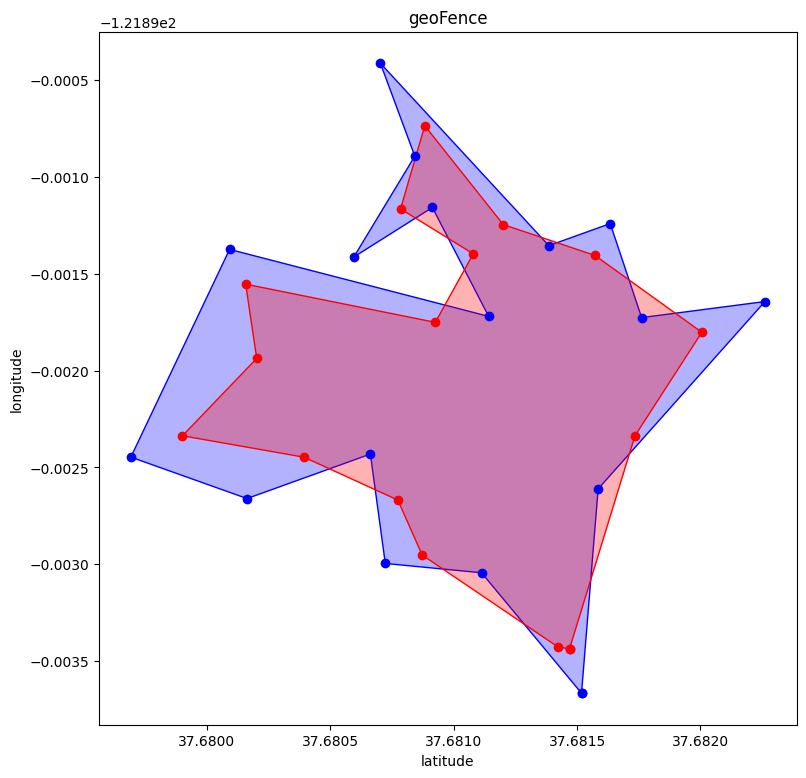

In [12]:
# Plot polygon
import matplotlib.pyplot as plt
from shapely.plotting import plot_polygon

fig = plt.figure(1, (9, 9))
ax = fig.add_subplot(111)
ax.set_title("geoFence")
ax.set_xlabel("latitude")
ax.set_ylabel("longitude")
plot_polygon(geofence_polygon, ax=ax, add_points=True, color="blue")
plot_polygon(waypoint_polygon, ax=ax, add_points=True, color="red")
plt.show()

### Check if a line intersects the polygon

In [21]:
from shapely.geometry import LineString

# Create a line for two waypoints
line1 = LineString(waypoints[:2])
line2 = LineString(waypoints[1:3])

def line_intersects_polygon(line, polygon):
    # Check if the line intersects the polygon
    if line.intersects(polygon):
        print("Line intersects the polygon.")
    else:
        print("Line does not intersect the polygon.")

line_intersects_polygon(line1, geofence_polygon)
line_intersects_polygon(line2, geofence_polygon)

Line intersects the polygon.
Line intersects the polygon.


line.intersects() is not the one working for us. Try line.crosses():

In [22]:
# Try cross instead
def line_crosses_polygon(line, polygon):
    # Check if the line crosses the polygon
    if line.crosses(geofence_polygon):
        print("Line crosses the polygon.")
    else:
        print("Line does not cross the polygon.")


line_crosses_polygon(line1, geofence_polygon)
line_crosses_polygon(line2, geofence_polygon)

Line crosses the polygon.
Line does not cross the polygon.


In [20]:
def line_cross_polygon(line_coordinates, polygon):
    # Create a line for two waypoints
    line = LineString(line_coordinates)

    # Check if the line crosses the polygon
    return line.crosses(polygon)

for i in range(len(waypoints) - 1):
    line_coords = waypoints[i:i+2]
    is_cross = line_cross_polygon(line_coords, geofence_polygon)  
    print(i, line_coords, is_cross)

0 [[37.6814695, -121.8934354], [37.6817346, -121.8923366]] True
1 [[37.6817346, -121.8923366], [37.6820057, -121.8918026]] False
2 [[37.6820057, -121.8918026], [37.6815723, -121.8914061]] True
3 [[37.6815723, -121.8914061], [37.6812009, -121.891247]] True
4 [[37.6812009, -121.891247], [37.6808829, -121.8907372]] False
5 [[37.6808829, -121.8907372], [37.6807847, -121.8911661]] False
6 [[37.6807847, -121.8911661], [37.6810793, -121.891398]] True
7 [[37.6810793, -121.891398], [37.6809256, -121.8917514]] True
8 [[37.6809256, -121.8917514], [37.6801571, -121.8915545]] False
9 [[37.6801571, -121.8915545], [37.6802019, -121.8919375]] False
10 [[37.6802019, -121.8919375], [37.679901, -121.8923366]] False
11 [[37.679901, -121.8923366], [37.6803941, -121.8924472]] False
12 [[37.6803941, -121.8924472], [37.680774, -121.8926684]] True
13 [[37.680774, -121.8926684], [37.6808722, -121.8929516]] False
14 [[37.6808722, -121.8929516], [37.6814229, -121.8934263]] True


line.crosses() works fine. If no cross, we can use the path directly. Otherwise, need to find the shortest path without intersection.

### Find shortest path if a waypoint line intersects with polygon

In [31]:
def find_shortest_path(line, polygon):

    intersections = line.intersection(polygon)
    print(intersections.geom_type)

    # case 1: no intersection, the line is the shortest path
    if intersections.geom_type == 'LineString':
        shortest_path = line

    # case 2: has intersection, find shortest path
    elif intersections.geom_type == 'MultiLineString':
        for l in intersections.geoms:
            print(l)
        shortest_path = 

    return shortest_path

line = LineString(waypoints[:2])
find_shortest_path(line, geofence_polygon)

LineString
